In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Question 1

In [2]:
#%%bash
#awk '{gsub(/chrM/, "M"); gsub(/chrXVI/, "16"); gsub(/chrXV/, "15"); gsub(/chrXIV/, "14"); gsub(/chrXIII/, "13"); gsub(/chrXII/, "12"); gsub(/chrXI/, "11"); gsub(/chrX/, "10"); gsub(/chrIX/, "9"); gsub(/chrVIII/, "8");gsub(/chrVII/, "7"); gsub(/chrVI/, "6"); gsub(/chrV/, "5"); gsub(/chrIV/, "4"); gsub(/chrIII/, "3"); gsub(/chrII/, "2"); gsub(/chrI/, "1"); print;}' BYxRM_segs_saccer3.bam.simplified.vcf > _new_num_chr.vcf

In [3]:
%%bash
plink --vcf ~/qbb2020-answers/quantbio/week3/_new_num_chr.vcf --pca --mind


PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --mind
  --pca
  --vcf /Users/cmdb/qbb2020-answers/quantbio/week3/_new_num_chr.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%3

In [4]:
pca = pd.read_csv('~/qbb2020-answers/quantbio/week3/plink.eigenvec', sep=' ', header = None)
pca

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,A01,1,0.029378,0.018745,0.022175,0.044528,-0.001789,-0.050865,0.021753,0.029626,...,0.026522,0.016841,-0.006246,-0.006940,-0.018867,0.005404,-0.015076,0.033143,-0.024146,-0.031972
1,A01,2,-0.017887,-0.015345,-0.009631,-0.068047,0.059240,-0.039711,-0.029401,-0.072011,...,0.016000,0.032868,0.006906,0.002385,-0.005891,0.027033,0.018026,-0.024712,-0.012689,0.007008
2,A01,3,-0.013429,-0.014787,-0.054910,-0.038837,0.041852,-0.021421,-0.025730,0.045609,...,-0.043116,0.036535,0.006282,0.008186,-0.013674,-0.047069,0.026872,0.011978,0.018804,-0.005523
3,A01,4,0.023954,-0.069207,0.000777,0.009675,-0.022796,-0.031488,0.027907,-0.021277,...,-0.012396,-0.046710,-0.003235,-0.005111,-0.020471,-0.030723,0.015964,0.057114,-0.028091,0.053180
4,A01,5,-0.036794,0.070514,0.023257,-0.010419,-0.017322,-0.006097,-0.017309,0.006571,...,0.039460,-0.014528,0.002385,-0.015274,0.016490,0.032988,0.012756,0.025461,-0.015445,-0.031543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.026606,0.032423,0.071461,0.010042,0.034463,-0.001477,-0.002375,-0.015118,...,0.003805,0.034901,-0.033627,-0.008241,-0.002863,-0.032656,-0.028643,0.018956,-0.002176,0.023879
947,A11,93,-0.008119,-0.010684,-0.050010,-0.035384,0.048263,0.002550,-0.051717,-0.040367,...,-0.001955,-0.000349,-0.009283,-0.016167,0.001374,-0.039100,-0.017596,0.023039,-0.000226,0.025441
948,A11,94,-0.001145,0.060205,0.001088,-0.005471,0.000833,0.053251,-0.008853,0.019402,...,-0.053303,0.025990,0.066653,0.049832,-0.034562,-0.073626,-0.029021,-0.043632,-0.019187,0.065169
949,A11,95,-0.002577,0.051168,0.009742,-0.007548,-0.028898,0.052776,-0.010332,0.005138,...,-0.027829,0.045514,0.000397,-0.026079,-0.015475,-0.028324,-0.001001,0.015677,-0.021918,-0.004906


In [5]:
%%bash
head -n 30 _new_num_chr.vcf

##fileformat=VCFv4.2
##fileDate=20170921
##source=freeBayes v1.1.0-dirty
##reference=genome/sacCer3.fa
##contig=<ID=1,length=230218>
##contig=<ID=2,length=813184>
##contig=<ID=3,length=316620>
##contig=<ID=4,length=1531933>
##contig=<ID=9,length=439888>
##contig=<ID=5,length=576874>
##contig=<ID=6,length=270161>
##contig=<ID=7,length=1090940>
##contig=<ID=8,length=562643>
##contig=<ID=10,length=745751>
##contig=<ID=11,length=666816>
##contig=<ID=12,length=1078177>
##contig=<ID=13,length=924431>
##contig=<ID=14,length=784333>
##contig=<ID=15,length=1091291>
##contig=<ID=16,length=948066>
##contig=<ID=M,length=85779>
##phasing=none
##commandline="freebayes -f genome/sacCer3.fa BYxRM_segs_saccer3.bam --use-best-n-alleles 4 --min-alternate-count 20 --region 1:0-10000"
##filter="QUAL > 50000"
##INFO=<ID=AF,Number=A,Type=Float,Description="Estimated allele frequency in the range (0,1]">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=DP,Number=1,Type=Integer,Descrip

# Question 2: Histogram of Allele Frequencies

In [6]:
file = open('/Users/cmdb/qbb2020-answers/quantbio/week3/_new_num_chr.vcf', 'r')
AF_list = []
count = 0
for line in file:
    if line.startswith('#'):
        continue
    fields = line.strip('\r\n').split('\t')
    AF_temp = fields[7]
    AF_temp2= AF_temp[3:].split(',')
    for val in AF_temp2:
        AF_list.append(float(val))
print(AF_list[0:15])
file.close()

[0.690206, 0.710472, 0.565776, 0.503932, 0.712679, 0.713408, 0.695903, 0.493498, 0.496109, 0.5215, 0.529564, 0.524582, 0.518839, 0.522523, 0.519038]


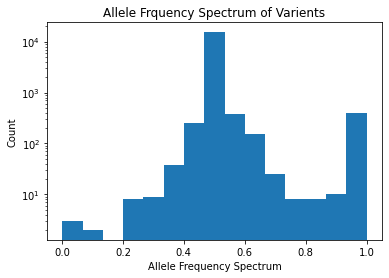

In [9]:
fig, ax = plt.subplots()
ax.hist(AF_list, bins = 15)
ax.set_title('Allele Frquency Spectrum of Varients')
ax.set_xlabel('Allele Frequency Spectrum')
ax.set_yscale('log')
ax.set_ylabel('Count')

plt.show()

# Question 3

In [ ]:
#this just got rid of all the underscores in the file, which i need to fix because it causes problems later on
#%%bash
#awk '{gsub("_","\t"); print}' BYxRM_PhenoData.txt > new_pheno.txt

In [10]:
#manually added in FID and IID to first columns (made issues later on without these)
#need to separate FID (A01) from IID which are separated by an underscore (A01_01)

file = open('BYxRM_PhenoData.txt', 'r')
new_file = open('new_pheno1.txt', 'w')

for line in file:
    if 'Cadium' in line:
        continue #skip header
    else:
        step1 = line.split("_") #split by underscore
        line = step1[0] + "\t" + step1[1] # FID and IID put together
        new_file.write(line)
new_file.close
        

<function TextIOWrapper.close>

In [ ]:
%%bash
plink --vcf ~/qbb2020-answers/quantbio/week3/_new_num_chr.vcf --pheno ~/qbb2020-answers/quantbio/week3/new_pheno1.txt --linear --allow-no-sex --covar plink.eigenvec --covar-number 1-10 --all-pheno 

# Question 4

In [11]:
gwas = pd.read_csv("plink.P1.assoc.linear", sep = "\s+")

gwas['logP'] = -1 * np.log10(gwas['P'])
gwas['snp_index'] = range(len(gwas))
gwas

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
0,1,.,1074,C,ADD,670,-0.6198,-1.6840,0.092700,1.032920,0
1,1,.,1074,C,COV1,670,8.9640,1.2280,0.220000,0.657577,1
2,1,.,1074,C,COV2,670,7.5140,1.0430,0.297300,0.526805,2
3,1,.,1074,C,COV3,670,-8.2050,-1.0990,0.272200,0.565112,3
4,1,.,1074,C,COV4,670,-7.7670,-1.0490,0.294700,0.530620,4
...,...,...,...,...,...,...,...,...,...,...,...
182859,16,.,942826,G,COV6,670,-20.5600,-2.7640,0.005872,2.231214,182859
182860,16,.,942826,G,COV7,670,-1.9520,-0.2577,0.796700,0.098705,182860
182861,16,.,942826,G,COV8,670,-9.1700,-1.2110,0.226300,0.645315,182861
182862,16,.,942826,G,COV9,670,-12.2500,-1.6470,0.099980,1.000087,182862


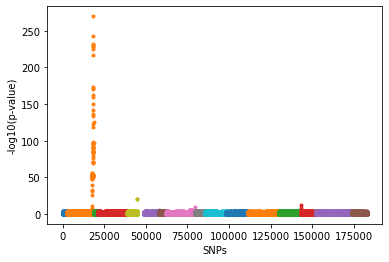

In [12]:
#generate single manhattan plot to make sure know how to do so, will make for loop for the rest
gwas['snp_index'] = range(len(gwas))

fig, ax = plt.subplots()

for chr in range(1, 23): 
    ax.scatter(gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr], marker = '.')

plt.xlabel("SNPs")
plt.ylabel("-log10(p-value)")
    
plt.show()

In [13]:
gwas_sorted = gwas.sort_values(by = "P")
gwas_sorted

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
18447,2,.,795756,C,ADD,699,-5.771,-58.88,1.172000e-270,269.931072,18447
18458,2,.,798782,A,ADD,706,-5.628,-52.50,6.741000e-244,243.171276,18458
18469,2,.,799317,A,ADD,701,-5.581,-50.26,1.191000e-232,231.924088,18469
18480,2,.,799991,G,ADD,705,-5.576,-49.86,1.998000e-231,230.699405,18480
18513,2,.,800746,C,ADD,713,5.526,49.25,8.674000e-230,229.061781,18513
...,...,...,...,...,...,...,...,...,...,...,...
182089,16,.,890346,T,COV6,666,NaN,NaN,NaN,NaN,182089
182090,16,.,890346,T,COV7,666,NaN,NaN,NaN,NaN,182090
182091,16,.,890346,T,COV8,666,NaN,NaN,NaN,NaN,182091
182092,16,.,890346,T,COV9,666,NaN,NaN,NaN,NaN,182092


In [14]:
gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
gwas_sorted

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index,uniform_points,uniform_pval,uniform_logP
18447,2,.,795756,C,ADD,699,-5.771,-58.88,1.172000e-270,269.931072,18447,0,0.000005,5.262128
18458,2,.,798782,A,ADD,706,-5.628,-52.50,6.741000e-244,243.171276,18458,1,0.000011,4.961098
18469,2,.,799317,A,ADD,701,-5.581,-50.26,1.191000e-232,231.924088,18469,2,0.000016,4.785007
18480,2,.,799991,G,ADD,705,-5.576,-49.86,1.998000e-231,230.699405,18480,3,0.000022,4.660068
18513,2,.,800746,C,ADD,713,5.526,49.25,8.674000e-230,229.061781,18513,4,0.000027,4.563158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182089,16,.,890346,T,COV6,666,NaN,NaN,NaN,NaN,182089,182859,0.999978,0.000009
182090,16,.,890346,T,COV7,666,NaN,NaN,NaN,NaN,182090,182860,0.999984,0.000007
182091,16,.,890346,T,COV8,666,NaN,NaN,NaN,NaN,182091,182861,0.999989,0.000005
182092,16,.,890346,T,COV9,666,NaN,NaN,NaN,NaN,182092,182862,0.999995,0.000002


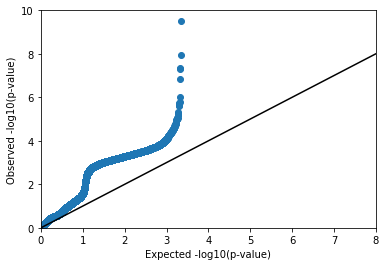

In [15]:
#generate single QQ plot to make sure know how to do so, will make for loop for the rest
gwas['snp_index'] = range(len(gwas))

fig, ax = plt.subplots()

ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
ax.plot([8,0], [8, 0], color = "black") #index 8 is p value 

plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

In [16]:
#pheno = ["Cadmium_Chloride", "Caffeine", "Calcium_Chloride", "Cisplatin", "Cobalt_Chloride", "Congo_red", "Copper", "Cycloheximide", "Diamide", "E6_Berbamine", "Ethanol," "Formamide", "Galactose", "Hydrogen_Peroxide", "Hydroquinone", "Hydroxyurea", "Indoleacetic_Acid", "Lactate", "Lactose", "Lithium_Chloride", "Magnesium_Chloride", "Magnesium_Sulfate", "Maltose", "Mannose", "Menadione	Neomycin", "Paraquat", "Raffinose", "SDS", "Sorbitol", "Trehalose", "Tunicamycin", "x4-Hydroxybenzaldehyde", "x4NQO", "x5-Fluorocytosine", ",x5-Fluorouracil", "x6-Azauracil", "Xylose", "YNB", "YNB:ph3", "YNB:ph8", "YPD", "YPD:15C", "YPD:37C", "YPD:4C", "Zeocin"]
#pheno
pheno = ["Cadmium", "Caffeine", "Calcium", "Cisplatin", "Cobalt", "Congo", "Copper", "Cycloheximide", "Diamide", "E6", "Ethanol," "Formamide", "Galactose", "Hydrogen", "Hydroquinone", "Hydroxyurea", "Indoleacetic", "Lactate", "Lactose", "Lithium", "Magnesium", "Maltose", "Mannose", "Menadione","Neomycin", "Paraquat", "Raffinose", "SDS", "Sorbitol", "Trehalose", "Tunicamycin", "x4-Hydroxybenzaldehyde", "x4NQO", "x5-Fluorocytosine", ",x5-Fluorouracil", "x6-Azauracil", "Xylose", "YNB", "YNB:ph3", "YNB:ph8", "YPD", "YPD:15C", "YPD:37C", "YPD:4C", "Zeocin"]
pheno

['Cadmium',
 'Caffeine',
 'Calcium',
 'Cisplatin',
 'Cobalt',
 'Congo',
 'Copper',
 'Cycloheximide',
 'Diamide',
 'E6',
 'Ethanol,Formamide',
 'Galactose',
 'Hydrogen',
 'Hydroquinone',
 'Hydroxyurea',
 'Indoleacetic',
 'Lactate',
 'Lactose',
 'Lithium',
 'Magnesium',
 'Maltose',
 'Mannose',
 'Menadione',
 'Neomycin',
 'Paraquat',
 'Raffinose',
 'SDS',
 'Sorbitol',
 'Trehalose',
 'Tunicamycin',
 'x4-Hydroxybenzaldehyde',
 'x4NQO',
 'x5-Fluorocytosine',
 ',x5-Fluorouracil',
 'x6-Azauracil',
 'Xylose',
 'YNB',
 'YNB:ph3',
 'YNB:ph8',
 'YPD',
 'YPD:15C',
 'YPD:37C',
 'YPD:4C',
 'Zeocin']

In [17]:
chr_axis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,26] #plink assigned M chromosome to 26

ValueError: x and y must be the same size

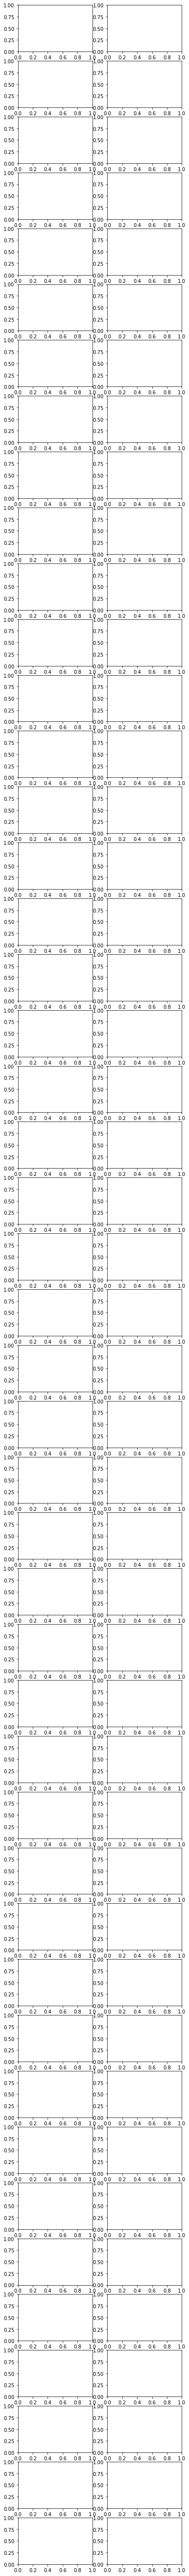

In [51]:
#in for loop need to make pandas data frame, manhattan plot, and QQ plot for each phenotype

fig, ax = plt.subplots(nrows=46, ncols=2)
fig.set_figheight(96) #space out plots 
for phenotype in range(0, len(pheno)):
    #make data frames for all phenotypes 
    gwas = pd.read_csv("plink." + pheno[phenotype] + ".assoc.linear", sep = "\s+")

    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))
    
    for chr in range(0, len(chr_axis)):
    #Manhattan plot
 
        ax[phenotype][0].scatter(gwas["snp_index"][gwas["CHR"] == chr_axis[chr]], gwas["logP"][gwas["CHR"] == chr], marker = '.')

        ax[phenotype][0].set_xlabel("SNPs")
        ax[phenotype][0].set_ylabel("-log10(p-value)")
        ax[phenotype][0].set_title(phentypes[row])  #set title as corresponding phenotype
        

    #QQ plot
  

    ax[phenotype][1].scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    ax.plot([8,0], [8, 0], color = "black")


    ax[phenotype][1].set_xlabel("Expected -log10(p-value)")
    ax[phenotype][1].set_ylabel("Observed -log10(p-value)")
    ax[phenotype][0].set_title(phentypes[row])
    
plt.tightlayout()
    
 
    

# Question 5

In [21]:
Caffeine = pd.read_csv("plink.Caffeine.assoc.linear", sep = "\s+")
Caffeine.sort_values("P")

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P
155168,15,.,69357,A,COV2,861,8.582,11.10,8.242000e-27
155256,15,.,71084,C,COV2,839,8.660,11.08,1.038000e-26
155531,15,.,80664,C,COV2,834,8.597,11.08,1.086000e-26
155410,15,.,76001,C,COV2,852,8.518,10.97,2.816000e-26
155289,15,.,71659,G,COV2,839,8.597,10.93,4.350000e-26
...,...,...,...,...,...,...,...,...,...
182089,16,.,890346,T,COV6,796,NaN,NaN,NaN
182090,16,.,890346,T,COV7,796,NaN,NaN,NaN
182091,16,.,890346,T,COV8,796,NaN,NaN,NaN
182092,16,.,890346,T,COV9,796,NaN,NaN,NaN


In [22]:
%%bash
grep "#CHROM" BYxRM_segs_saccer3.bam.simplified.vcf > chrXV_69357_gen.txt
grep "chrXV" BYxRM_segs_saccer3.bam.simplified.vcf | grep "69357" >> chrXV_69357_gen.txt

In [24]:
gen = pd.read_csv("chrXV_69357_gen.txt", sep = "\s+", header = None)
gen = gen.iloc[:,9:].T.rename(columns={0:'subject_id', 1:'genotype:read_depth'}) #treanspose and rename dataframe
gen

,subject_id,genotype:read_depth
9,A01_01,1/1:7
10,A01_02,0/0:6
11,A01_03,1/1:8
12,A01_04,1/1:7
13,A01_05,0/0:12
...,...,...
1060,A11_92,0/0:7
1061,A11_93,1/1:6
1062,A11_94,0/0:6
1063,A11_95,0/0:11


In [49]:
phen = pd.read_csv('BYxRM_PhenoData.txt', sep = '\s+')
phen = phen.iloc[:,1:].rename(columns={0:'subject_id'})
phen

,Caffeine,Calcium_Chloride,Cisplatin,Cobalt_Chloride,Congo_red,Copper,Cycloheximide,Diamide,E6_Berbamine,Ethanol,...,x6-Azauracil,Xylose,YNB,YNB:ph3,YNB:ph8,YPD,YPD:15C,YPD:37C,YPD:4C,Zeocin
A01_01,0.279993,0.313118,1.658179,-1.604442,5.841617,-4.130950,0.821226,3.622602,-0.378747,-0.644954,...,1.199054,-0.309149,17.470822,0.055225,-0.184268,24.548971,0.712171,0.890842,4.118372,8.592818
A01_02,-0.206326,-0.534844,-0.918012,0.892198,-1.618172,1.131947,-0.764736,-2.946279,-2.475193,-0.203038,...,0.443182,0.697908,18.052925,0.283462,1.662201,26.808476,-1.522498,0.006062,0.066515,-4.220476
A01_03,-0.127960,-0.311102,-2.712088,3.301709,-6.680571,-1.138056,-3.382532,-3.157866,-4.178616,-0.100542,...,1.472629,1.474329,18.163782,-0.951379,0.369565,26.183975,1.082289,1.723157,5.714088,-6.506519
A01_04,0.878392,-0.563331,-0.827358,-1.291270,2.753851,-2.268121,0.867456,-6.832079,-1.970630,-1.728767,...,0.054694,-0.739040,15.575856,-1.690867,-0.840344,20.893646,-0.636280,0.053258,-3.196936,0.294462
A01_05,-1.353169,0.405204,-1.137234,4.260286,-7.391216,-3.222742,1.586376,1.048391,-3.971730,0.815289,...,0.267463,0.959138,17.808444,0.127621,1.967267,28.621507,-3.720999,-0.768724,-4.002786,7.045575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A11_92,-0.893290,-0.329504,0.257061,-3.120957,2.556543,2.567092,2.054232,1.672347,5.465978,-0.452469,...,0.232614,1.130568,16.629005,0.531583,NaN,23.520842,0.159946,-5.158120,-0.090273,-7.030154
A11_93,1.145573,0.048948,-1.089350,0.539833,2.720952,-3.445357,0.891066,3.003684,-1.667592,-2.995565,...,-0.317916,1.977915,15.687951,-0.098451,NaN,21.553930,2.977722,-1.913176,4.279626,-4.650492
A11_94,0.321844,NaN,1.016712,1.801923,-4.157083,-0.097598,-1.954080,-1.739499,-6.520551,NaN,...,-1.698334,1.363267,17.357844,0.390511,NaN,23.977236,0.078992,1.801422,NaN,-0.499069
A11_95,-1.001507,NaN,0.004191,4.675717,-10.240998,1.244410,-0.810857,2.305318,9.321186,NaN,...,0.259829,0.942454,17.098753,-0.432459,NaN,22.927686,-0.254905,-1.747526,NaN,-7.435961


In [50]:
Caffeine = pd.merge(gen, phen)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False